In [1]:
import nltk 
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [3]:
#Loading the data
data = requests.get('http://shakespeare.mit.edu/romeo_juliet/full.html')

#Setting the encoding to utf-8
data.encoding = 'utf-8'

#Get the data in html
data_html = data.text
print(data_html[:2000])


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
 "http://www.w3.org/TR/REC-html40/loose.dtd">
 <html>
 <head>
 <title>Romeo and Juliet: Entire Play
 </title>
 <meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1">
 <LINK rel="stylesheet" type="text/css" media="screen"
       href="/shake.css">
 </HEAD>
 <body bgcolor="#ffffff" text="#000000">

<table width="100%" bgcolor="#CCF6F6">
<tr><td class="play" align="center">Romeo and Juliet
<tr><td class="nav" align="center">
      <a href="/Shakespeare">Shakespeare homepage</A> 
    | <A href="/romeo_juliet/">Romeo and Juliet</A> 
    | Entire play
</table>

<H3>ACT I</h3>
<h3>PROLOGUE</h3>
<blockquote>
<A NAME=1.0.1>Two households, both alike in dignity,</A><br>
<A NAME=1.0.2>In fair Verona, where we lay our scene,</A><br>
<A NAME=1.0.3>From ancient grudge break to new mutiny,</A><br>
<A NAME=1.0.4>Where civil blood makes civil hands unclean.</A><br>
<A NAME=1.0.5>From forth the fatal loins of these two foes<

In [5]:
#Creating a beautifulSoup object
soup = BeautifulSoup(data_html)

#Gathering the text from the soup
text = soup.get_text()

print(text[10000:20000])

an in sadness make his will:
Ah, word ill urged to one that is so ill!
In sadness, cousin, I do love a woman.

BENVOLIO

I aim'd so near, when I supposed you loved.

ROMEO

A right good mark-man! And she's fair I love.

BENVOLIO

A right fair mark, fair coz, is soonest hit.

ROMEO

Well, in that hit you miss: she'll not be hit
With Cupid's arrow; she hath Dian's wit;
And, in strong proof of chastity well arm'd,
From love's weak childish bow she lives unharm'd.
She will not stay the siege of loving terms,
Nor bide the encounter of assailing eyes,
Nor ope her lap to saint-seducing gold:
O, she is rich in beauty, only poor,
That when she dies with beauty dies her store.

BENVOLIO

Then she hath sworn that she will still live chaste?

ROMEO

She hath, and in that sparing makes huge waste,
For beauty starved with her severity
Cuts beauty off from all posterity.
She is too fair, too wise, wisely too fair,
To merit bliss by making me despair:
She hath forsworn to love, and in that vow
Do I li

In [6]:
#Cleaning the text from unwanted characters
#Will start by tokenizing the text
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)

print(tokens[:20])

['Romeo', 'and', 'Juliet', 'Entire', 'Play', 'Romeo', 'and', 'Juliet', 'Shakespeare', 'homepage', 'Romeo', 'and', 'Juliet', 'Entire', 'play', 'ACT', 'I', 'PROLOGUE', 'Two', 'households']


In [8]:
#Get the text in lower case
lower_case = []

#Looping thru the tokens and put every word in the list as lower case 
for word in tokens:
    lower_case.append(word.lower())

print (lower_case[:20])

['romeo', 'and', 'juliet', 'entire', 'play', 'romeo', 'and', 'juliet', 'shakespeare', 'homepage', 'romeo', 'and', 'juliet', 'entire', 'play', 'act', 'i', 'prologue', 'two', 'households']


In [11]:
#Get the stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
text_stopwords = stopwords.words('english')

print(text_stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#Get rid of the stopwords
no_stopwords = []

#loop tru the text and only put no stopwprds to the list
for word in lower_case:
    if word not in text_stopwords:
        no_stopwords.append(word)
        
print (no_stopwords[:10])

['romeo', 'juliet', 'entire', 'play', 'romeo', 'juliet', 'shakespeare', 'homepage', 'romeo', 'juliet']


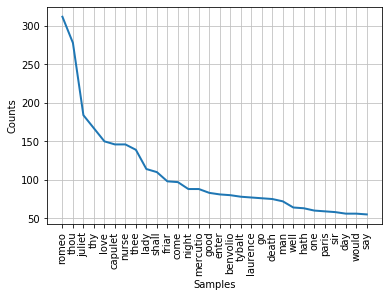

In [20]:
#Getting the word frequency
frequency = nltk.FreqDist(no_stopwords)
frequency.plot(30)